# Clustering Technique

## Overview

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups.

Let's take an example. Suppose, you are the head of a rental store and wish to understand perferences of your customers to scale up your business. Is it possible for you to look at details of each customers and devise a unique business strategy for each one of them? Definitely not. But, what you can do is to cluster all of your customers into say 10 groups based on their purchasing habits and use a separately strategy for customers in each of these 10 groups. And this is what we call clustering.

## Types of Clustering

Broadly speaking, clustering can be divided into two subgroups:
- Hard Clustering: In hard clustering, each data point either belongs to a cluster completely or not. For example, in the above example each customer is put into one group out of the 10 groups.
- Soft Clustering: In soft clustering, instead of putting each data point into a seperate cluster, a probability or likelihood of that data point to be in those clusters is assigned. For example, from the above scenario each customer is assigned a probability to be in either of 10 clusters of the retail store.

In [1]:
# ![title](inner_join.png)

## Introduction to k-means clustering

![title](fig01.png)

k-means clustering algorithm
1. Randomly placing k centroids, one for each cluster
2. Calculate the distance of each point from each centroid
3. Assign each data point (feature values) to its nearest centroid, creating a cluster
4. Recalculate the position of the k centroids.
5. Repeat steps 2-4 until the centroids no longer move.

## Clustering via K-means

Briefly speaking, k-means clustering aims to find the set of k clusters such that every data point is assigned to the closest center, and the sum of the distances of all such assignments is minimized.

Let's walk through a simple 2D example to better understand the idea. Imaging we have these gray points in the following figure and want to assign them into three clusters.

![title](Picture1-1.png)

### Step one

We randomly pick three points C1, C2, and C3, and label them with blue, green and red color separately to represent the cluster centers.

![title](Picture2.png)

### Step two

Assign observations to the closest cluster center

![title](Picture3.png)

Once we have these cluster centers, we can assign each point to the clusters based on the minimum distance to the cluster center. For the gray point A, compute its distance to C1, C2, and C3, respectively. And after comparing the lengths of d1, d2, and d3, we figure out that d1 is the smallest, therefore, we assign point A to the blue cluster and label it with blue. We then move to point B and follow the same procedure. This process can assign all the points to the following figure.

![title](Picture4.png)

### Step three: revise cluster center as mean of assigned observations

Now we've assigned all the points based on which cluster center they were closest to. Next, we need to update the cluster centers based on the poitns assigned to them.

For instance, we can find the center mass of the blue center by summing over all the blue points and dividing the total number of points, which is four here. And the resulted center mass C1', represented by a blue diamond, is our new center for the blue cluster. Similarly, we can find the new centers C2' and C3' for the green and red clusters.

![title](Picture5.png)

### Step four: Repeat step 2 and step 3 until convergence

The last step of k-means is just to repeat the above two steps. For example, in this case, once C1', C2' and C3' are assigned as the new cluster centers, point D becomes closer to C3' and thus can be assigned to the red cluster. We keep on iterating between assigning points to cluster centers, and updating the cluster centers until convergence. Finally, we may get a solution like the following figure.

![title](Picture6.png)

# Customer Segmentation by K-means Clustering

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
tx_data = pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')

In [4]:
tx_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# convert the starting data field to datetime
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])

In [6]:
# we will use the UK data only
tx_uk = tx_data[tx_data.Country == 'United Kingdom'].reset_index(drop=True)

You can do many different segmentations according to what you are trying to achieve. Now we are going to implement RFM

RFM stands for Recency - Frequency - Monetary Value. Theoretically we will have segments like below:

- Low Value: Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero - maybe negative revenue.
- Mid Value: In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.
- High Value: The group we don't want to lose. High Revenue, Frequency and Low Inactivity

## Recency

In [7]:
tx_user = pd.DataFrame(tx_data['CustomerID'].unique())

In [8]:
tx_user.columns = ['CustomerID']

In [10]:
tx_user.head()

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [11]:
# get the max purchase date for each customer and create a dataframe with it
tx_max_purchase = tx_uk.groupby('CustomerID')['InvoiceDate'].max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

In [12]:
# We take our observation point as the max invoice date in our dataset
tx_max_purchase['MaxPurchaseDate'].max()

Timestamp('2011-12-09 12:49:00')

In [13]:
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

In [15]:
tx_max_purchase.head()

,CustomerID,MaxPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2


In [16]:
# merge this dataframe to our new user dataframe
tx_user = pd.merge(tx_user,tx_max_purchase[['CustomerID','Recency']], on = 'CustomerID')

In [17]:
tx_user.head()

,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,13748.0,95
3,15100.0,329
4,15291.0,25


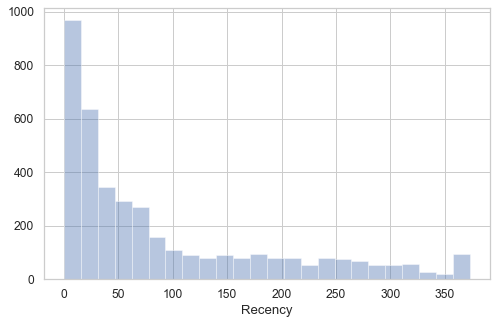

In [18]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.distplot(tx_user['Recency'], kde = False)

We are going to apply K-means clustering to assign a recency score. But how many clusters we need?

In [19]:
tx_recency = tx_user[['Recency']]

In [20]:
# for example with 2 clusters, is it fine?
k = 2
kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(tx_recency)
tx_recency['cluster'] = kmeans.labels_
sse = kmeans.inertia_
sse

8179918.617231623

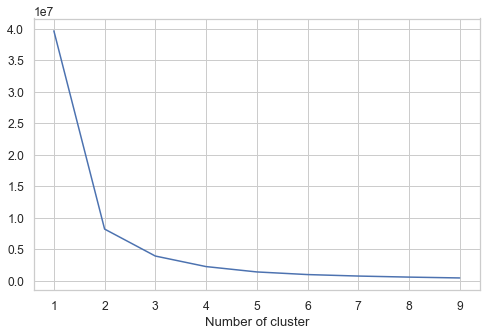

In [21]:
sse={}
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()
# https://scikit-learn.org/stable/modules/clustering.html

We will select 4 cluster for this example

In [22]:
# build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters = 4)
kmeans.fit(tx_user[['Recency']])

KMeans(n_clusters=4)

In [23]:
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

In [24]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [25]:
tx_user = order_cluster('RecencyCluster','Recency',tx_user,False)

In [26]:
tx_user.head()

,CustomerID,Recency,RecencyCluster
0,17850.0,301,0
1,15100.0,329,0
2,18074.0,373,0
3,16250.0,260,0
4,13747.0,373,0


In [27]:
tx_user.groupby('RecencyCluster').agg({'CustomerID': ['count'], 'Recency': ['mean']})

,CustomerID,Recency
,count,mean
RecencyCluster,,
0,478,304.393305
1,568,184.625000
2,954,77.679245
3,1950,17.488205


## Frequency

In [28]:
tx_frequency = tx_uk.groupby('CustomerID').InvoiceDate.count().reset_index()

In [29]:
tx_frequency.columns = ['CustomerID','Frequency']

In [30]:
# add this data to our main dataframe
tx_user = pd.merge(tx_user, tx_frequency, on = 'CustomerID')

In [31]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency
0,17850.0,301,0,312
1,15100.0,329,0,6
2,18074.0,373,0,13
3,16250.0,260,0,24
4,13747.0,373,0,1


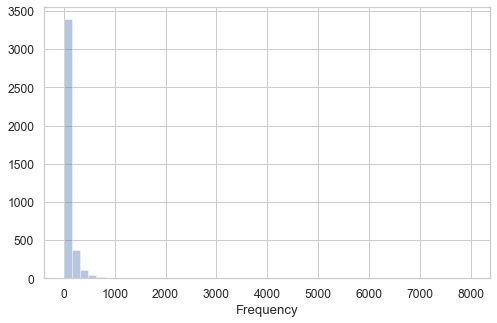

In [32]:
sns.distplot(tx_user['Frequency'], kde = False)

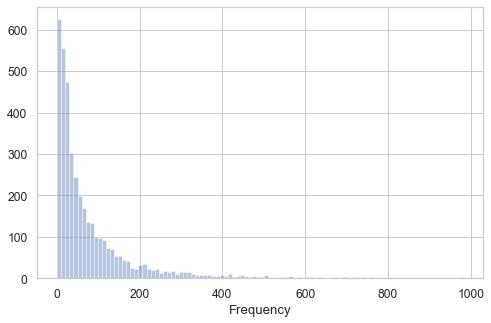

In [33]:
sns.distplot(tx_user[tx_user.Frequency < 1000]['Frequency'], kde = False, bins = 100)

In [34]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

#order the frequency cluster
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

#see details of each cluster
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3495.0,49.485551,44.897776,1.0,15.00,33.0,73.0,189.0
1,430.0,330.893023,133.873745,190.0,227.25,287.0,398.0,803.0
2,22.0,1313.136364,505.934524,872.0,988.50,1140.0,1452.0,2782.0
3,3.0,5917.666667,1805.062418,4642.0,4885.00,5128.0,6555.5,7983.0


## Revenue

In [35]:
#calculate revenue for each customer
tx_uk['Revenue'] = tx_uk['UnitPrice'] * tx_uk['Quantity']
tx_revenue = tx_uk.groupby('CustomerID').Revenue.sum().reset_index()

#merge it with our main dataframe
tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')

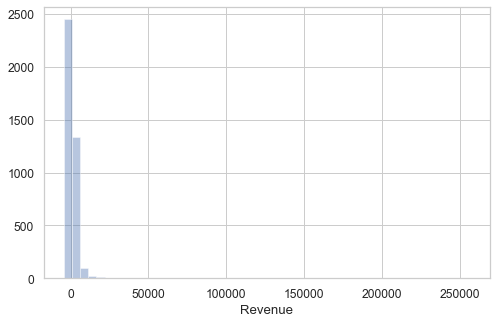

In [36]:
sns.distplot(tx_user['Revenue'], kde = False)

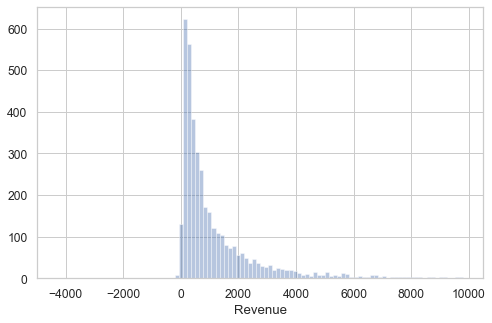

In [37]:
sns.distplot(tx_user[tx_user.Revenue < 10000]['Revenue'], kde = False, bins = 100)

In [38]:
#apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])


#order the cluster numbers
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

#show details of the dataframe
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3686.0,906.329979,920.325222,-4287.63,262.8975,572.5055,1257.5925,4301.22
1,235.0,7746.035787,3636.348298,4314.72,5152.9650,6530.0400,9116.7900,21535.90
2,27.0,43070.445185,15939.249588,25748.35,28865.4900,36351.4200,53489.7900,88125.38
3,2.0,221960.330000,48759.481478,187482.17,204721.2500,221960.3300,239199.4100,256438.49


## Overall Score

In [39]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,17850.0,301,0,312,1,5288.63,1
1,14688.0,7,3,359,1,5107.38,1
2,13767.0,1,3,399,1,16945.71,1
3,15513.0,30,3,314,1,14520.08,1
4,14849.0,21,3,392,1,7904.28,1


In [40]:
# We create a simple overall score by simply get sum of RecencyCluster, FrequencyCluster, and RevenueCluster
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']

In [42]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore
0,17850.0,301,0,312,1,5288.63,1,2
1,14688.0,7,3,359,1,5107.38,1,5
2,13767.0,1,3,399,1,16945.71,1,5
3,15513.0,30,3,314,1,14520.08,1,5
4,14849.0,21,3,392,1,7904.28,1,5


In [45]:
tx_user.groupby('OverallScore')[['Recency','Frequency','Revenue']].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,304.584388,21.995781,303.339705
1,185.362989,32.596085,498.087546
2,78.983678,46.996736,864.332570
3,20.729318,68.304434,1092.971126
4,14.929766,271.481605,3601.606990
5,9.662162,373.290541,9136.946014
6,7.740741,876.037037,22777.914815
7,1.857143,1272.714286,103954.025714
8,1.333333,5917.666667,42177.930000


The scoring shows that score 8 is our best customers whilst 0 is the worst
We can simply classify our customers by the following rules:
- 0 to 2: Low value
- 3 to 4: Mid Value
- 5+: High Value

In [46]:
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore'] > 2, 'Segment'] = 'Mid-Value'
tx_user.loc[tx_user['OverallScore'] > 4, 'Segment'] = 'High-Value'

In [47]:
## How our segments distributed on a scatter plot

In [48]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,17850.0,301,0,312,1,5288.63,1,2,Low-Value
1,14688.0,7,3,359,1,5107.38,1,5,High-Value
2,13767.0,1,3,399,1,16945.71,1,5,High-Value
3,15513.0,30,3,314,1,14520.08,1,5,High-Value
4,14849.0,21,3,392,1,7904.28,1,5,High-Value


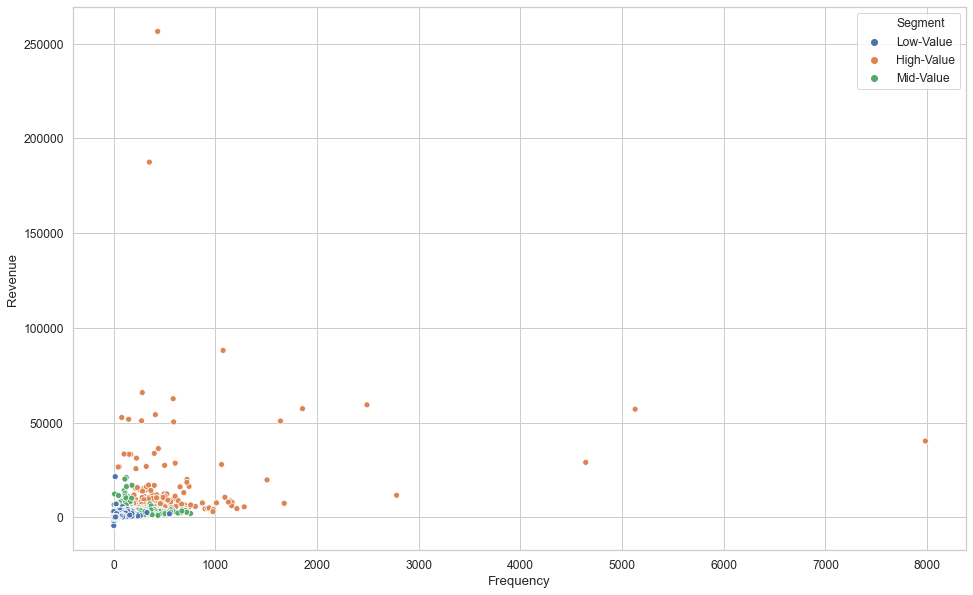

In [49]:
plt.figure(figsize = (16,10))
sns.scatterplot(x = 'Frequency', y = 'Revenue', data = tx_user, hue = 'Segment')

In [50]:
tx_user_non_outlier = tx_user[(tx_user.Frequency < 2000) & (tx_user.Revenue < 50000)]

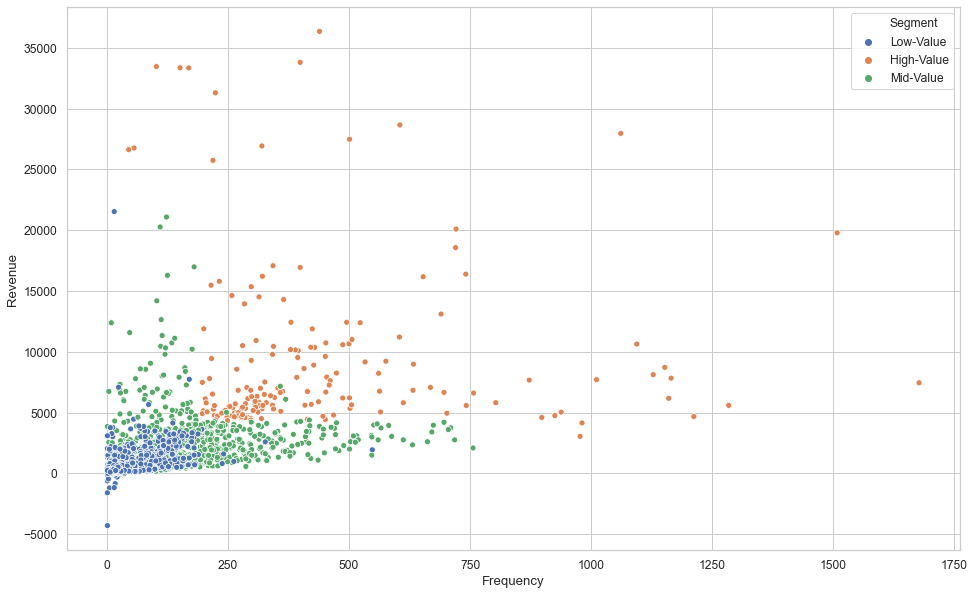

In [51]:
plt.figure(figsize = (16,10))
sns.scatterplot(x = 'Frequency', y = 'Revenue', data = tx_user_non_outlier, hue = 'Segment')

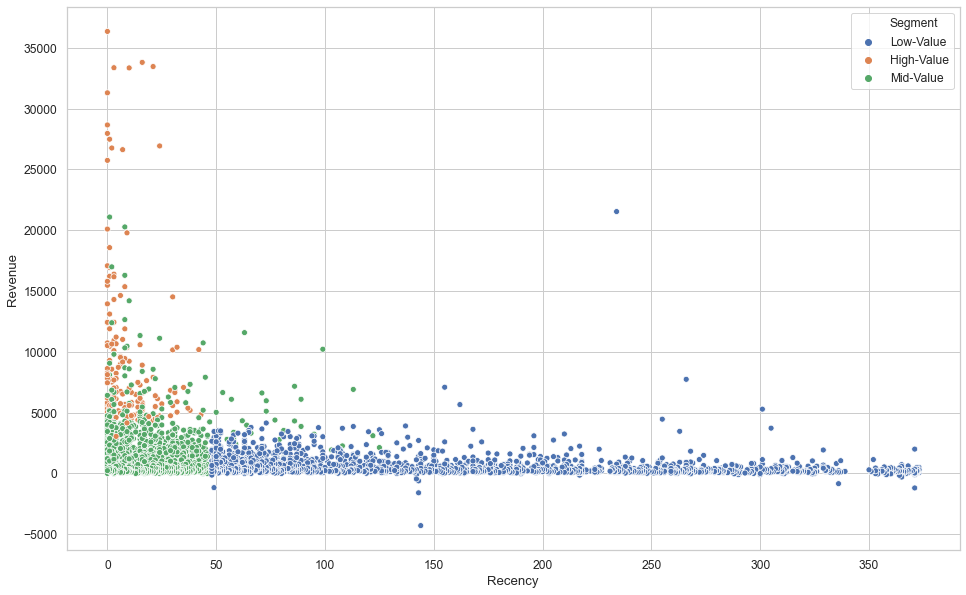

In [52]:
plt.figure(figsize = (16,10))
sns.scatterplot(x = 'Recency', y = 'Revenue', data = tx_user_non_outlier, hue = 'Segment')

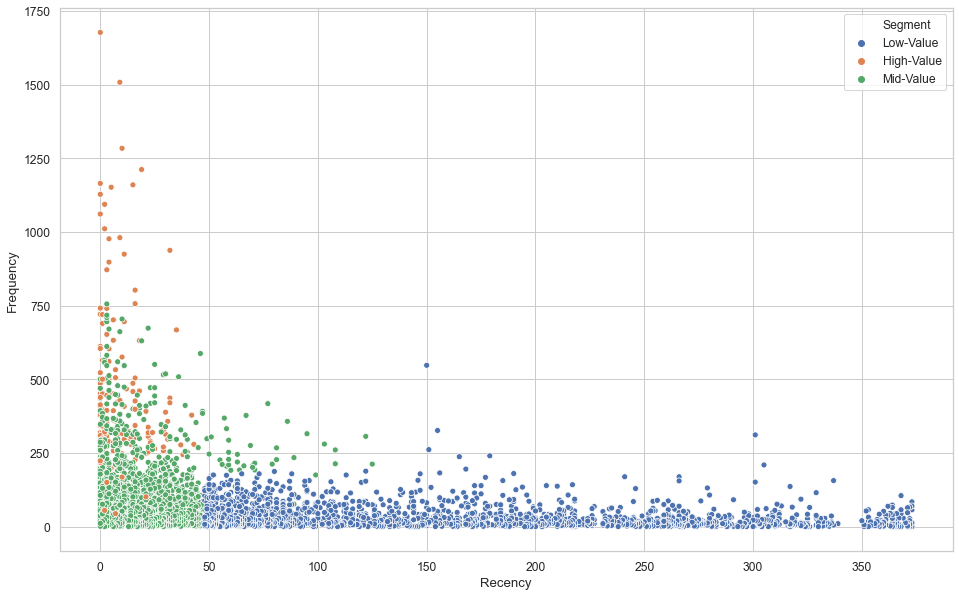

In [53]:
plt.figure(figsize = (16,10))
sns.scatterplot(x = 'Recency', y = 'Frequency', data = tx_user_non_outlier, hue = 'Segment')